#Realizado por Katalina Morales Dueñas

#Organizar Base de Datos

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
covi = pd.read_csv('/content/drive/MyDrive/Base_Covid.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
covi.head()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,19,1,F,Importado,Casa,Leve,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6.0,NaN
1,11/3/2020 0:00:00,8,9/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,22,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,NaN
2,11/3/2020 0:00:00,9,8/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,28,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,7/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6.0,NaN
3,12/3/2020 0:00:00,10,12/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,36,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,NaN
4,12/3/2020 0:00:00,11,11/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,42,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,31/3/2020 0:00:00,PCR,6.0,NaN


In [5]:
covi.shape

(1460569, 23)

In [6]:
sum(covi['Nombre departamento'] == 'BOGOTA')

1460569

In [7]:
covi = covi.drop(['fecha reporte web', 'ID de caso', 'Fecha de notificación',
           'Código DIVIPOLA departamento','Código DIVIPOLA municipio',
           'Nombre municipio','Unidad de medida de edad','Código ISO del país',
           'Nombre del país', 'Fecha de inicio de síntomas', 'Tipo de recuperación',
           'Pertenencia étnica','Nombre del grupo étnico','Recuperado'], axis=1)

In [8]:
covi = covi.drop(['Nombre departamento'], axis=1)

In [9]:
covi = covi.drop(['Fecha de recuperación'], axis=1)
covi

,Edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Fecha de muerte,Fecha de diagnóstico
0,19,F,Importado,Casa,Leve,NaN,6/3/2020 0:00:00
1,22,F,Importado,Casa,Leve,NaN,11/3/2020 0:00:00
2,28,F,Importado,Casa,Leve,NaN,11/3/2020 0:00:00
3,36,F,Importado,Casa,Leve,NaN,12/3/2020 0:00:00
4,42,F,Importado,Casa,Leve,NaN,12/3/2020 0:00:00
...,...,...,...,...,...,...,...
1460564,3,M,En estudio,Hospital,Moderado,NaN,19/11/2021 0:00:00
1460565,37,F,En estudio,Casa,Leve,NaN,20/11/2021 0:00:00
1460566,32,F,En estudio,Casa,Leve,NaN,20/11/2021 0:00:00
1460567,15,F,En estudio,Casa,Leve,NaN,20/11/2021 0:00:00


In [10]:
covi = covi.drop(['Fecha de muerte'], axis=1)

In [11]:
covi = covi.drop(['Ubicación del caso', 'Estado'], axis=1)

In [12]:
covi

,Edad,Sexo,Tipo de contagio,Fecha de diagnóstico
0,19,F,Importado,6/3/2020 0:00:00
1,22,F,Importado,11/3/2020 0:00:00
2,28,F,Importado,11/3/2020 0:00:00
3,36,F,Importado,12/3/2020 0:00:00
4,42,F,Importado,12/3/2020 0:00:00
...,...,...,...,...
1460564,3,M,En estudio,19/11/2021 0:00:00
1460565,37,F,En estudio,20/11/2021 0:00:00
1460566,32,F,En estudio,20/11/2021 0:00:00
1460567,15,F,En estudio,20/11/2021 0:00:00


In [13]:
covi = covi[covi['Fecha de diagnóstico'].notna()]

In [14]:
covi['Fecha de diagnóstico'] = pd.to_datetime(covi['Fecha de diagnóstico'], dayfirst= True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
covi

,Edad,Sexo,Tipo de contagio,Fecha de diagnóstico
0,19,F,Importado,2020-03-06
1,22,F,Importado,2020-03-11
2,28,F,Importado,2020-03-11
3,36,F,Importado,2020-03-12
4,42,F,Importado,2020-03-12
...,...,...,...,...
1460564,3,M,En estudio,2021-11-19
1460565,37,F,En estudio,2021-11-20
1460566,32,F,En estudio,2021-11-20
1460567,15,F,En estudio,2021-11-20


In [16]:
from datetime import datetime 

In [17]:
covi = covi.sort_values(by='Fecha de diagnóstico') #Tabla para hacer exploratorio
covi

,Edad,Sexo,Tipo de contagio,Fecha de diagnóstico
0,19,F,Importado,2020-03-06
1,22,F,Importado,2020-03-11
2,28,F,Importado,2020-03-11
3,36,F,Importado,2020-03-12
4,42,F,Importado,2020-03-12
...,...,...,...,...
1460340,20,F,En estudio,2021-11-21
1460335,19,M,En estudio,2021-11-21
1460520,55,M,En estudio,2021-11-21
1460364,23,M,En estudio,2021-11-21


In [92]:
#PARA LA SERIE DE TIEMPO
base = pd.DataFrame(covi['Fecha de diagnóstico']);base

,Fecha de diagnóstico
0,2020-03-06
1,2020-03-11
2,2020-03-11
3,2020-03-12
4,2020-03-12
...,...
1460340,2021-11-21
1460335,2021-11-21
1460520,2021-11-21
1460364,2021-11-21


In [93]:
base = base.assign(Cantidad=1); base

,Fecha de diagnóstico,Cantidad
0,2020-03-06,1
1,2020-03-11,1
2,2020-03-11,1
3,2020-03-12,1
4,2020-03-12,1
...,...,...
1460340,2021-11-21,1
1460335,2021-11-21,1
1460520,2021-11-21,1
1460364,2021-11-21,1


In [94]:
base = base.groupby('Fecha de diagnóstico').sum(); base

,Cantidad
Fecha de diagnóstico,
2020-03-06,1
2020-03-11,2
2020-03-12,2
2020-03-13,1
2020-03-14,10
...,...
2021-11-17,280
2021-11-18,369
2021-11-19,312


In [95]:
base['Cantidad'].sum()

1460345

In [22]:
base.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 622 entries, 2020-03-06 to 2021-11-21
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Cantidad  622 non-null    int64
dtypes: int64(1)
memory usage: 9.7 KB


In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics

In [97]:
base.reset_index(inplace=True)

In [36]:
]base

,Fecha de diagnóstico,Cantidad
0,2020-03-06,1
1,2020-03-11,2
2,2020-03-12,2
3,2020-03-13,1
4,2020-03-14,10
...,...,...
617,2021-11-17,280
618,2021-11-18,369
619,2021-11-19,312
620,2021-11-20,220


In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error

In [27]:
import matplotlib.pyplot as plt

#Análisis Exploratorio de Datos

In [46]:
import plotly.express as px
import matplotlib.pyplot as plt

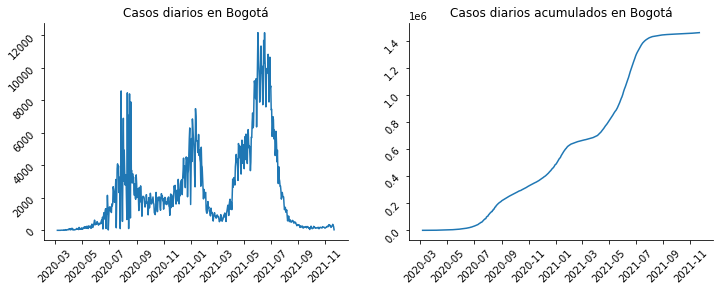

In [26]:
fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(base['Cantidad'])
ax[0].tick_params(rotation = 45)
ax[0].set_title('Casos diarios en Bogotá')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

ax[1].plot(base['Cantidad'].cumsum())
ax[1].set_title('Casos diarios acumulados en Bogotá')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].tick_params(rotation = 45)

In [27]:
print(covi['Fecha de diagnóstico'].min())
print(covi['Fecha de diagnóstico'].max())

2020-03-06 00:00:00
2021-11-21 00:00:00


En la serie de tiempo que se va a analizar se tienen en cuenta variables como edad, sexo, tipo de contagio y fecha de diagnóstico para el estudio exploratorio de datos.
La serie comienza desde el 06 de marzo del 2020 y termina el 21 de noviembre del 2021. Aqui se tomará en cuenta la cantidad de contagios diarios de Covid-19 tomados por la Instituto  Nacional De salud para la ciudad de Bogotá.
Asi mismo, se puede ver las tres olas que se presentaron durante el año 2020 y loq ue se lleva del 2021. En el grafico derecho aparece la cantidad de casos acumulados en estos mismos periodos de tiempo donde se demuestra que los casos de Covid-19 fueron incrementando a medida que pasaba el tiempo.

In [28]:
covi.describe()

,Edad
count,1.460345e+06
mean,3.856750e+01
std,1.765320e+01
min,1.000000e+00
25%,2.600000e+01
50%,3.600000e+01
75%,5.100000e+01
max,1.140000e+02


In [29]:
base.describe()

,Cantidad
count,622.000000
mean,2347.821543
std,2614.764805
min,1.000000
25%,286.250000
50%,1514.500000
75%,3354.750000
max,12168.000000




- Se puede evidenciar que, las personas que se contagiaron de este virus entre los periodos anteriormente nombrados en la ciudad de Bogota tienen en promedio 38 a 39 años de edad. Además de ello, aproximadamente el 50% de los individuos que se contagiaron de coronavirus tienen una edad de 36 años o menos.

- Por otro lado, la serie fue medida diariamente obteniendo un total de 622 dias. En promedio, las personas contagiadas son en promedio 2348. El numero maximo de contagios que hubo durante estos periodos de tiempo fue de 12,168. Finalmente, el 75% de los dias, se contagiaron 3355 personas o menos diariamente en Bogotá. 


In [31]:
covi_1 = covi.assign(Cantidad=1); covi_1

,Edad,Sexo,Tipo de contagio,Fecha de diagnóstico,Cantidad
0,19,F,Importado,2020-03-06,1
1,22,F,Importado,2020-03-11,1
2,28,F,Importado,2020-03-11,1
3,36,F,Importado,2020-03-12,1
4,42,F,Importado,2020-03-12,1
...,...,...,...,...,...
1460340,20,F,En estudio,2021-11-21,1
1460335,19,M,En estudio,2021-11-21,1
1460520,55,M,En estudio,2021-11-21,1
1460364,23,M,En estudio,2021-11-21,1


In [33]:
edad_categorica = pd.DataFrame(covi_1['Edad'])

In [34]:
edad_categorica = edad_categorica.rename(columns={'Edad':'Edad_categorica'})

In [35]:
edad_categorica = edad_categorica.astype(object)

In [36]:
covi_2 = pd.concat([covi_1,edad_categorica], axis = 1)

In [37]:
covi_2 = covi_2.groupby('Edad').sum()

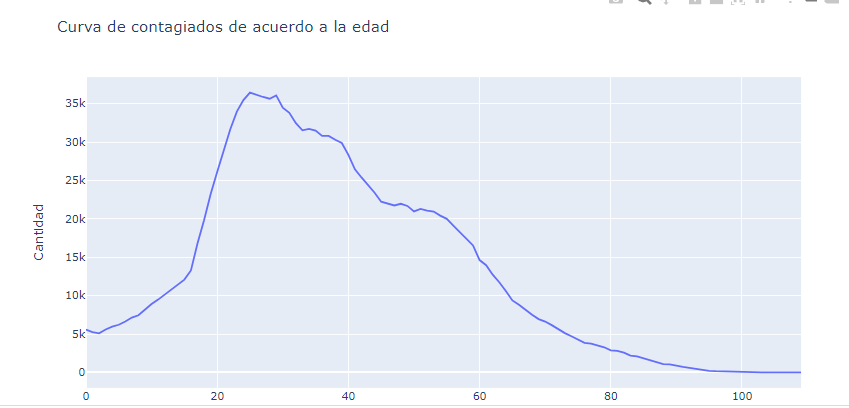

In [46]:
px.line(covi_2, 
        y=covi_2['Cantidad'].to_list(), 
        labels={"y":"Cantidad"},
       title="Curva de contagiados de acuerdo a la edad")

[Adjunto imagen ya que al momento de subir a git hub la grafica interactiva no sale]



De acuerdo al gráfico anterior se puede decir que para los años donde se presento el covid 19 en Bogota las personas más afectadas son aquellas entre los 20 y 40 años. Las personas de edad adulta (Por ejemplo aquellos de 80 años) llegaban a registrar 2878 casos durante este periodo mientras que las personas de 26 años acumularon más de 36.442 casos positivos confrimados en laboratorio. 

In [385]:
sum(covi['Sexo'] == "F")

780608

In [353]:
sum(covi['Sexo'] == "M")

679726

In [355]:
sum(covi['Sexo'] == "f")

5

In [356]:
sum(covi['Sexo'] == "m")

6

In [72]:
F = 780608+5
M = 679726+6

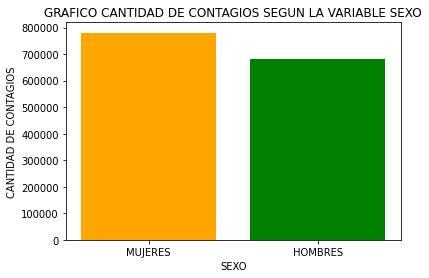

In [482]:
cc = ['MUJERES', 'HOMBRES']
data = [F,M]
plt.bar(cc,data, color=['orange','green'])
plt.title('GRAFICO CANTIDAD DE CONTAGIOS SEGUN LA VARIABLE SEXO')
plt.xlabel('SEXO')
plt.ylabel('CANTIDAD DE CONTAGIOS')
plt.show()

De acuerdo al grafico anterior es importante decir que el sexo al que pertenecen las personas que en su mayoria fueron contagiadas es el femenino.

In [68]:
covi_1.loc[covi_1['Sexo'] == 'f', 'Sexo'] = 'F'

In [69]:
covi_1.loc[covi_1['Sexo'] == 'm', 'Sexo'] = 'M'

In [70]:
mujeres = covi_1[covi_1['Sexo'] == "F"]

In [71]:
mujeres

,Edad,Sexo,Tipo de contagio,Fecha de diagnóstico,Cantidad
0,19,F,Importado,2020-03-06,1
1,22,F,Importado,2020-03-11,1
2,28,F,Importado,2020-03-11,1
3,36,F,Importado,2020-03-12,1
4,42,F,Importado,2020-03-12,1
...,...,...,...,...,...
1460503,40,F,En estudio,2021-11-21,1
1460507,39,F,En estudio,2021-11-21,1
1460508,40,F,En estudio,2021-11-21,1
1460509,39,F,En estudio,2021-11-21,1


In [74]:
mujeres = mujeres.groupby('Fecha de diagnóstico').sum()

In [75]:
mujeres['Cantidad'].mean()

1255.0048231511255

In [76]:
hombres = covi_1[covi_1['Sexo'] == "M"]; hombres

,Edad,Sexo,Tipo de contagio,Fecha de diagnóstico,Cantidad
17,21,M,Importado,2020-03-14,1
16,29,M,Importado,2020-03-14,1
14,72,M,Importado,2020-03-14,1
13,54,M,Importado,2020-03-14,1
9,23,M,Relacionado,2020-03-14,1
...,...,...,...,...,...
1460348,21,M,En estudio,2021-11-21,1
1460335,19,M,En estudio,2021-11-21,1
1460520,55,M,En estudio,2021-11-21,1
1460364,23,M,En estudio,2021-11-21,1


In [77]:
hombres = hombres.groupby('Fecha de diagnóstico').sum()

In [78]:
hombres['Cantidad'].mean()

1099.8899676375404

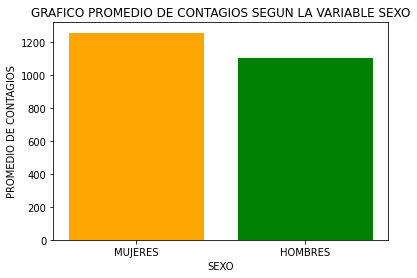

In [553]:
cc = ['MUJERES', 'HOMBRES']
data = [mujeres['Cantidad'].mean(),hombres['Cantidad'].mean()]
plt.bar(cc,data, color=['orange','green'])
plt.title('GRAFICO PROMEDIO DE CONTAGIOS SEGUN LA VARIABLE SEXO')
plt.xlabel('SEXO')
plt.ylabel('PROMEDIO DE CONTAGIOS')
plt.show()

De acuerdo a sus promedios es logico pensar que las mujeres seran aquellas quienes se contagien mas del coronavirus. En promedio el numero de mujeres contagiadas diariamente es igual a 1255 y para los hombres es de 1099. Sin embargo, ¿Estas medias serán estadísticamente significativas?

In [558]:
import scipy.stats as stats
from scipy.stats import ttest_ind
ttest_ind(mu, ho)

Ttest_indResult(statistic=2.080509257585034, pvalue=0.037684081261290386)

In [555]:
mu = list(mujeres['Cantidad'])

In [556]:
ho = list(hombres['Cantidad'])

Tomando un alpha al 5% se puede decir que los promedios de los casos presentes para el sexo femenino y el masculino en la ciudad de Bogotá son estadisticamente diferentes. Esto significa que en promedio es más probable que los individuos de sexo femenino se contagien en mayor cantidad que los del sexo masculino. 

In [492]:
meses = base.resample('M').mean()
meses

,Cantidad
Fecha de diagnóstico,
2020-03-31,17.409091
2020-04-30,74.433333
2020-05-31,237.774194
2020-06-30,673.266667
2020-07-31,2372.870968
2020-08-31,3624.000000
2020-09-30,1871.733333
2020-10-31,1744.387097
2020-11-30,1863.033333


- De acuerdo a la tabla anterior se puede evidenciar que los meses de mayo,junio y julio del año 2021 se presentan la mayor cantidad de contagios.
- Lo que se lleva del mes de noviembre en este año se han presentado 240 contagios de covid aproximadamente.

In [50]:
covi

,Edad,Sexo,Tipo de contagio,Fecha de diagnóstico
0,19,F,Importado,2020-03-06
1,22,F,Importado,2020-03-11
2,28,F,Importado,2020-03-11
3,36,F,Importado,2020-03-12
4,42,F,Importado,2020-03-12
...,...,...,...,...
1460340,20,F,En estudio,2021-11-21
1460335,19,M,En estudio,2021-11-21
1460520,55,M,En estudio,2021-11-21
1460364,23,M,En estudio,2021-11-21


In [57]:
sum(covi['Tipo de contagio'] == 'Comunitaria')

223656

In [51]:
sum(covi['Tipo de contagio'] == 'Importado')

939

In [52]:
sum(covi['Tipo de contagio'] == 'En estudio')

708002

In [53]:
sum(covi['Tipo de contagio'] == 'Relacionado')

527748

In [58]:
527748+708002+939+223656

1460345

In [66]:
cc3 = ['En estudio', 'Relacionado','Comunitario','Importado']
data3 = [708002,527748,223656,939]

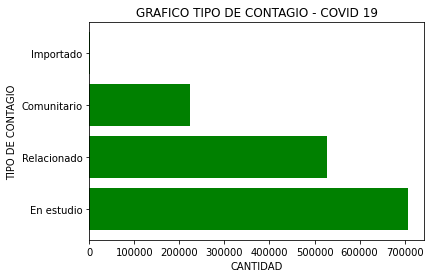

In [67]:
plt.barh(cc3,data3, color = ['green'])
plt.title('GRAFICO TIPO DE CONTAGIO - COVID 19')
plt.xlabel('CANTIDAD')
plt.ylabel('TIPO DE CONTAGIO')
plt.show()

Conforme al grafico anterior se puede decir que la cantidad de personas contagiadas por "Importado" son minimas. Es decir, los individuos que fueron contagiados en otros paises diferentes a Colombia fueron 939 aproximadamente. Como el Covid 19 es un virus que aparecio de forma "reciente" aun no se tienen registros actualizados frente al tipo de contagio, por ende, la mayor cantidad de personas todavia se encuentran en ese proceso de estudio.
Finalmente aquellos quienes estan dentro del contagio comunitario y relacionado (527.748 = Relacionado y 223.656 = Comunitario) adquirieron el virus en el pais.

In [80]:
base

,Cantidad
Fecha de diagnóstico,
2020-03-06,1
2020-03-11,2
2020-03-12,2
2020-03-13,1
2020-03-14,10
...,...
2021-11-17,280
2021-11-18,369
2021-11-19,312


Text(0.5, 1.0, 'Cuarentena')

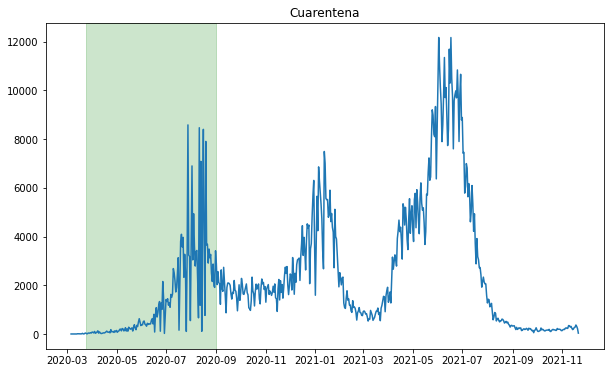

In [81]:
#CUARENTENA
fig,ax = plt.subplots(1,1,figsize = (10,6))
ax.plot(base['Cantidad'])
ax.axvspan(pd.Timestamp('2020-03-25'), pd.Timestamp('2020-08-31'), alpha = 0.2, color = 'green')
ax.set_title('Cuarentena')

De acuerdo al grafico anterior se puede observar que a pesar de estar en cuarentena las siguientes dos olas aumentaron y en mayor potencia con un numero mayor en casos de contagios.

Text(0.5, 1.0, 'Cuarentena')

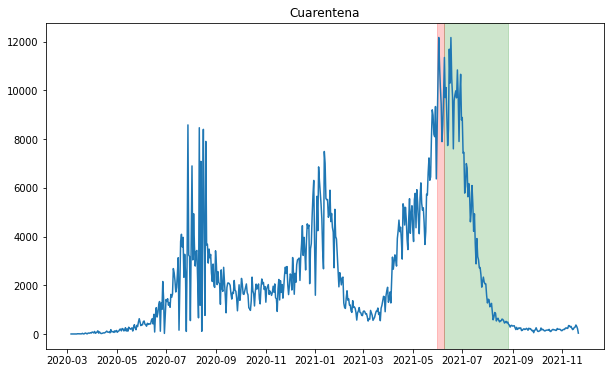

In [83]:
fig,ax = plt.subplots(1,1,figsize = (10,6))
ax.plot(base['Cantidad'])
ax.axvspan(pd.Timestamp('2021-06-08'), pd.Timestamp('2021-08-26'), alpha = 0.2, color = 'green')
ax.axvspan(pd.Timestamp('2021-05-31'), pd.Timestamp('2021-06-08'), alpha = 0.2, color = 'red')
ax.set_title('Cuarentena')

La zona pintada de rojo hace referencia a la fecha del 5 de mayo del 2021 donde se presento la ola mas alta en Bogota.En la mayoria de zonas del país contaban con UCI por encima del 85%. "Eso incluye, por ahora, a Bogotá, que se estaba preparando aperturas de ese estilo desde el próximo 8 de junio del 2021." [https://www.portafolio.co/economia/gobierno/decreto-580-del-gobierno-para-la-reactivacion-economica-en-colombia-552501]
Se supone que  con una ocupación superior al 85% no se debio habilitar discotecas y lugares de baile, ni habilitar eventos públicos o privados que impliquen aglomeraciones. sin embargo, el 8 de junio del 2021 (Zona resaltada en verde) se realizó la apertura a pesar de tener registros tan altos en contagios donde la mayoria eran jovenes y adultos. Noticia tomada del 7 de junio del 2021 [https://bogota.gov.co/mi-ciudad/administracion-distrital/bares-y-gastrobares-podran-cerrar-la-1-am-desde-el-8-de-junio] 


#Prueba Estacionariedad

In [267]:
base

,Fecha de diagnóstico,Cantidad
0,2020-03-06,1
1,2020-03-11,2
2,2020-03-12,2
3,2020-03-13,1
4,2020-03-14,10
...,...,...
617,2021-11-17,280
618,2021-11-18,369
619,2021-11-19,312
620,2021-11-20,220


In [263]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(serie):
  dftest = adfuller(serie, autolag = 'AIC')
  dfoutput = pd.Series(dftest[0:4],
                       index = ['Test Statistic',
                                'p_value',
                                'No lags used',
                                'Number of observations used'])
  for key, value in dftest[4].items():
    dfoutput[key] = value
  print(dfoutput)
  if dftest[1] <= 0.05:
    print(dftest[1])
    print('Es estacionaria')
  else:
    print(dftest[1])
    print('No Es estacionaria')

In [265]:
adfuller_test(base['Cantidad']) 

Test Statistic                  -2.941575
p_value                          0.040723
No lags used                    17.000000
Number of observations used    604.000000
1%                              -3.441223
5%                              -2.866337
10%                             -2.569325
dtype: float64
0.04072265031497215
Es estacionaria


Una vez que tenemos confirmado que nuestra serie es estacionaria, podemos hacer pronóstico.

#Otros modelos





In [68]:
from xgboost import XGBRegressor

In [169]:
base_1 = pd.DataFrame(covi['Fecha de diagnóstico'])
base_1 = base.assign(Cantidad=1)
base_1 = base.groupby('Fecha de diagnóstico').sum()
base_1.reset_index(inplace=True)

In [278]:
base_1

,Fecha de diagnóstico,Cantidad
0,2020-03-06,1
1,2020-03-11,2
2,2020-03-12,2
3,2020-03-13,1
4,2020-03-14,10
...,...,...
617,2021-11-17,280
618,2021-11-18,369
619,2021-11-19,312
620,2021-11-20,220


In [335]:
base

,Cantidad
Fecha de diagnóstico,
2020-03-06,1
2020-03-11,2
2020-03-12,2
2020-03-13,1
2020-03-14,10
...,...
2021-11-17,280
2021-11-18,369
2021-11-19,312


In [215]:
def extraer_info(s):

   X = pd.DataFrame()
   X['dia'] = s.index.day
   X['mes'] = s.index.month
   X['trimestre'] = s.index.quarter
   X['diasemana'] = s.index.dayofweek
   X['diaaño'] = s.index.dayofyear
   X['semanaaño'] = s.index.weekofyear

   y=s.Cantidad

   return X, y

In [216]:
F = extraer_info(base)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  if __name__ == '__main__':


In [347]:
X = F[0]

In [348]:
Y = F[1]

In [349]:
Y = base_1['Cantidad']

In [350]:
base_final = pd.concat([X,Y], axis = 1)

In [351]:
base_final

,dia,mes,trimestre,diasemana,diaaño,semanaaño,Cantidad
0,6,3,1,4,66,10,1
1,11,3,1,2,71,11,2
2,12,3,1,3,72,11,2
3,13,3,1,4,73,11,1
4,14,3,1,5,74,11,10
...,...,...,...,...,...,...,...
617,17,11,4,2,321,46,280
618,18,11,4,3,322,46,369
619,19,11,4,4,323,46,312
620,20,11,4,5,324,46,220


In [387]:
X = base_final.drop(columns='Cantidad')
Y = base_final['Cantidad']

In [399]:
X_train, y_train = X[:506], Y[:506]
X_test, y_test = X[506:612], Y[506:612]
X_fore = X[612:]

In [400]:
from sklearn.preprocessing import MinMaxScaler

In [401]:
sc = MinMaxScaler(feature_range=(0,1))
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_fore = sc.transform(X_fore)

In [402]:
xgb_reg = XGBRegressor(n_estimators=200, max_depth=3)
xgb_reg.fit(X_train, y_train)
y_t = xgb_reg.predict(X_train)
y_pred = xgb_reg.predict(X_test)

[17:22:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [403]:
y_t = pd.DataFrame(y_t, index = y_train.index)
y_pred = pd.DataFrame(y_pred, index = y_test.index)
y_fore_xgb = pd.DataFrame(xgb_reg.predict(X_fore), index = X.index[612:])

In [404]:
y_pred

,0
506,3041.439209
507,2760.745361
508,1935.898804
509,2916.319092
510,3669.109131
...,...
607,1274.321777
608,1852.179443
609,1973.751221
610,1974.672852


In [405]:
def metricas(y_true, y_pred):
  print(f'MSE: {mean_squared_error(y_true, y_pred)}')
  print(f'MAE: {mean_absolute_error(y_true, y_pred)}')
  print(f'RMSE: {np.sqrt(mean_squared_error(y_true,y_pred))}')

In [406]:
print('Métricas del entrenamiento',end='\n')
print('---'*10)
metricas(y_train, y_t)
print('---'*10)
print('Métricas del testeo')
print('---'*10)
metricas(y_test, y_pred)

Métricas del entrenamiento
------------------------------
MSE: 1568288.2075350932
MAE: 921.9329347271222
RMSE: 1252.3131427622618
------------------------------
Métricas del testeo
------------------------------
MSE: 4410665.754754574
MAE: 1971.1504746922906
RMSE: 2100.1585070547826


In [407]:
import matplotlib.pyplot as plt

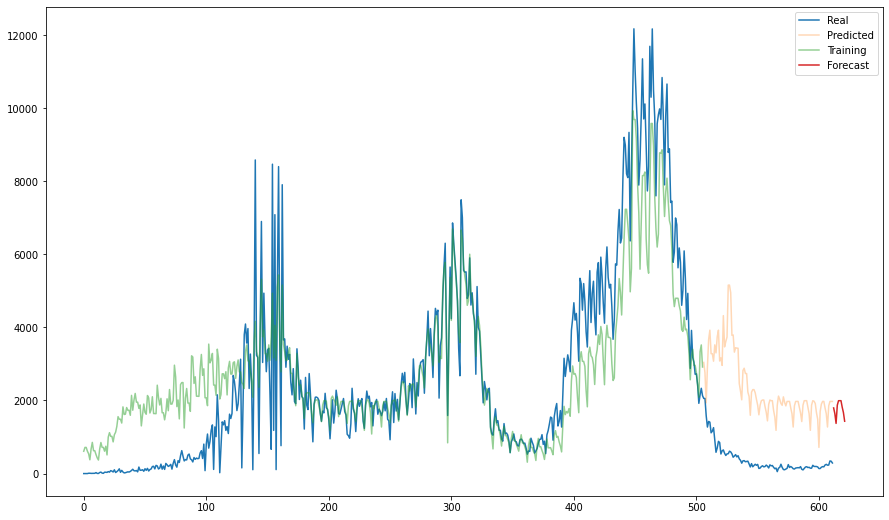

In [408]:
plt.figure(figsize=(15,9))
plt.plot(Y[:612], label = 'Real')
plt.plot(y_pred,alpha = 0.3, label = 'Predicted')
plt.plot(y_t,alpha = 0.5, label = 'Training')
plt.plot(y_fore_xgb, label = 'Forecast')
plt.legend()

In [ ]:
#ARBOLES DE DECISIÓN

In [292]:
reg_tree = DecisionTreeRegressor(max_depth=6)
reg_tree.fit(X_train, y_train)
reg_tree.predict(X_fore)
y_pred = reg_tree.predict(X_test)
y_fit_train = reg_tree.predict(X_train)

In [293]:
def metricas(y_true, y_pred):
  print(f'MSE: {mean_squared_error(y_true, y_pred)}')
  print(f'MAE: {mean_absolute_error(y_true, y_pred)}')
  print(f'RMSE: {np.sqrt(mean_squared_error(y_true,y_pred))}')

In [294]:
print('Métricas del entrenamiento',end='\n')
print('---'*10)
metricas(y_train, y_fit_train)
print('---'*10)
print('Métricas del testeo')
print('---'*10)
metricas(y_test, y_pred) 

Métricas del entrenamiento
------------------------------
MSE: 3339939.097410239
MAE: 1136.259716713686
RMSE: 1827.550025966523
------------------------------
Métricas del testeo
------------------------------
MSE: 4525804.403464077
MAE: 2011.5547377151152
RMSE: 2127.3938054493055


In [295]:
y_fit_train = pd.DataFrame(y_fit_train, index = y_train.index)
y_pred = pd.DataFrame(y_pred, index = y_test.index)
y_fore_tree = pd.DataFrame(reg_tree.predict(X_fore), index = X.index[612:])

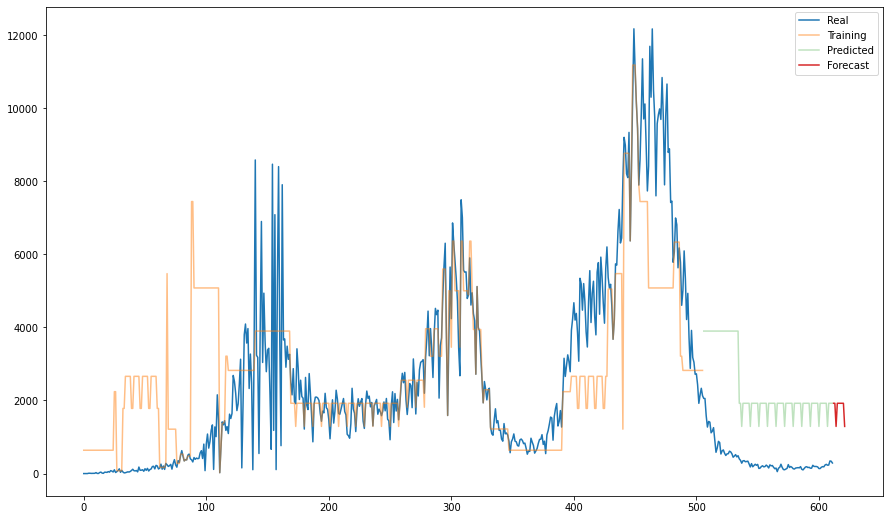

In [296]:
plt.figure(figsize=(15,9))
plt.plot(Y[:612], label = 'Real')
plt.plot(y_fit_train, alpha = 0.5, label = 'Training')
plt.plot(y_pred, alpha = 0.3, label = 'Predicted')
plt.plot(y_fore_tree, label = 'Forecast')
plt.legend()

#Serie de Tiempo LSTM

In [100]:
import numpy as np
np.random.seed(4)
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_excel('base.xlsx', index_col='Fecha de diagnóstico', parse_dates=['Fecha de diagnóstico'])
dataset.head()

,Unnamed: 0,Cantidad
Fecha de diagnóstico,,
2020-03-06,0,1
2020-03-11,1,2
2020-03-12,2,2
2020-03-13,3,1
2020-03-14,4,10


In [101]:
dataset.drop(['Unnamed: 0'], axis = 1)

,Cantidad
Fecha de diagnóstico,
2020-03-06,1
2020-03-11,2
2020-03-12,2
2020-03-13,1
2020-03-14,10
...,...
2021-11-17,280
2021-11-18,369
2021-11-19,312


In [339]:
set_entrenamiento = dataset[:'2021-07-1'].iloc[:,1:2]
set_validacion = dataset['2021-07-1':].iloc[:,1:2]

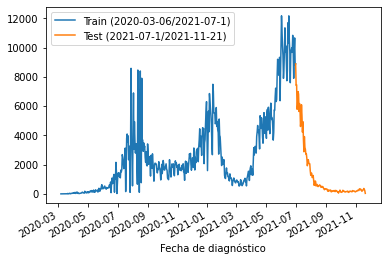

In [340]:
set_entrenamiento['Cantidad'].plot(legend=True)
set_validacion['Cantidad'].plot(legend=True)
plt.legend(['Train (2020-03-06/2021-07-1)', 'Test (2021-07-1/2021-11-21)'])
plt.show()

In [341]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
set_entrenamiento_escalado = sc.fit_transform(set_entrenamiento)

In [342]:
time_step = 5
X_train = []
Y_train = []
m = len(set_entrenamiento_escalado)
for i in range(time_step, m):
  X_train.append(set_entrenamiento_escalado[i-time_step:i,0])
  Y_train.append(set_entrenamiento_escalado[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)  

In [343]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [344]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [345]:
dim_entrada = (X_train.shape[1],1)
dim_salida = 1
na = 50 #Numero de neuronas

In [346]:
modelo = Sequential()

In [347]:
modelo.add(LSTM(units=na, input_shape=dim_entrada))

In [348]:
modelo.add(Dense(units=dim_salida))

In [349]:
modelo.compile(optimizer='rmsprop', loss='mse')

In [350]:
modelo.fit(X_train,Y_train,epochs=20,batch_size=32)

Epoch 1/20
15/15 [==============================] - 2s 5ms/step - loss: 0.0333
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0108
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0080
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0079
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0080
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0081
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 0.0078
Epoch 8/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0076
Epoch 9/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0077
Epoch 10/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0075
Epoch 11/20
15/15 [==============================] - 0s 6ms/step - loss: 0.0073
Epoch 12/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0078
Epoch 13/20
15/15 [==============================

In [351]:
x_test = set_validacion.values
x_test = sc.transform(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



In [352]:
X_test = []
for i in range(time_step,len(x_test)):
    X_test.append(x_test[i-time_step:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [353]:
prediccion = modelo.predict(X_test)
prediccion = sc.inverse_transform(prediccion)

In [354]:
prediccion

array([[7358.7646 ],
       [6968.3325 ],
       [6845.4175 ],
       [6507.5933 ],
       [6578.748  ],
       [6509.198  ],
       [6035.7544 ],
       [5668.9946 ],
       [5735.9873 ],
       [5579.964  ],
       [5291.65   ],
       [5341.6284 ],
       [5071.6006 ],
       [4427.453  ],
       [4115.988  ],
       [3897.947  ],
       [3523.7727 ],
       [3327.6997 ],
       [3283.9966 ],
       [2983.5422 ],
       [2732.512  ],
       [2542.1956 ],
       [2453.8484 ],
       [2336.4695 ],
       [2267.0635 ],
       [2291.7205 ],
       [2180.5757 ],
       [1967.9811 ],
       [1814.8645 ],
       [1676.5195 ],
       [1492.2723 ],
       [1406.1018 ],
       [1396.8801 ],
       [1299.0673 ],
       [1139.3944 ],
       [1047.7478 ],
       [ 981.20197],
       [ 900.14545],
       [ 832.89264],
       [ 838.2889 ],
       [ 822.4354 ],
       [ 757.24896],
       [ 688.80237],
       [ 687.1571 ],
       [ 669.5496 ],
       [ 661.6876 ],
       [ 670.53174],
       [ 681.

In [334]:
def graficar_predicciones(real, prediccion):
    plt.plot(real[0:len(prediccion)],color='red', label='Valor real del numero de contagiados')
    plt.plot(prediccion, color='blue', label='Predicción del numero de contagios')
    plt.xlabel('Tiempo')
    plt.ylabel('Cantidad de contagios')
    plt.legend()
    plt.show()

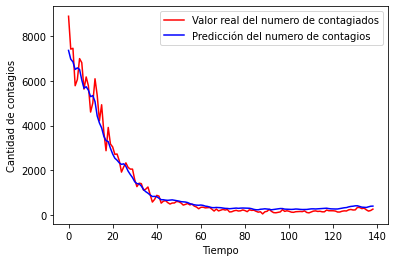

In [355]:
graficar_predicciones(set_validacion.values,prediccion)

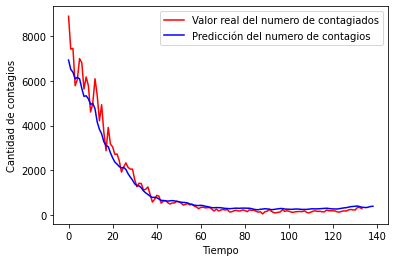

In [338]:
graficar_predicciones(set_validacion.values,prediccion)

Realizado por Katalina Morales Dueñas